### 2/16/18 ughhhh. the lmfit stuff is right. the model you gave me is wrong, and we both messed up the math you had me double check. I commented out a bunch of stuff so I could test (namely the helper functions)

In [58]:
import numpy as np
import lmfit as lmf
import matplotlib.pyplot as plt
%matplotlib inline



importdata = np.genfromtxt('IS400.csv',delimiter=',');  #read in data that i output from matlab. input format has each
                                                        #of the 16 Temperature data sets stacked vertically. 
npoints = 101; #each T has 101 points
IS400 = np.zeros((16,npoints,5)) #Initialize new 3d array to hold data. note: first index is what we would traditionally 
                            #think of as the last index. it makes sense though when you think hierarchically,
                            #i.e. main list has 16 elements each of which has 101 smaller elements containing 5 elemnts. 
for i in range(0,16):
    IS400[i,:,:]=importdata[(npoints*i):(npoints*(i+1)) , :] #slice the data into subarrays  
    
## Function definitions

def Zr(T): #pulls out Z'
    return IS400[T,:,3]
def Zi(T): #pulls out Z''
    return IS400[T,:,4]
def w(T): #pulls out omega
    return IS400[T,:,0]

#fig,ax = plt.subplots(1,1)
#ax.plot(Zr,-Zi,'.')
#ax.set_aspect('equal')

def resid(params,w,Zr,Zi):
    parvals = params.valuesdict()
    R = parvals['R']
    wk = parvals['wk']
    model1=np.real(np.sqrt(R/(1+1j*w/wk)))
    model2=-np.imag(np.sqrt(R/(1+1j*w/wk)))
    #model1 = np.sqrt(R/(1+(w/wk)**2))
    #model2 = -np.sqrt(R*w/(wk*(1+(w/wk)**2)))
    resid1 = model1-Zr
    resid2 = model2-Zi
    return np.concatenate((resid1,resid2))


  
    


In [59]:
params = lmf.Parameters()  #add parameters with guesses
params.add('R',value = 1.5)
params.add('wk',value = 300000)

fit = lmf.minimize(resid,params,args = (w(15)[-59:],Zr(15)[-59:],Zi(15)[-59:]))
Rfit = fit.params['R'].value
wkfit = fit.params['wk'].value
fit.params

Parameters([('R',
             <Parameter 'R', value=2.563130032070926 +/- 0.536, bounds=[-inf:inf]>),
            ('wk',
             <Parameter 'wk', value=279278.85583416006 +/- 1.18e+05, bounds=[-inf:inf]>)])

/usr/local/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


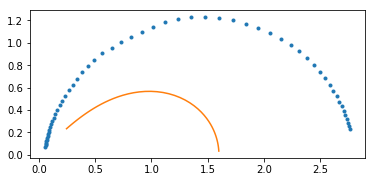

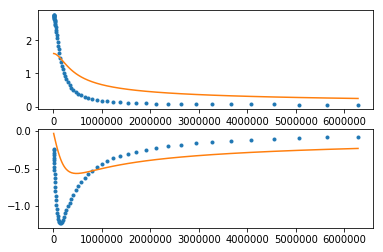

In [65]:
plt.plot(Zr(15)[-59:],-Zi(15)[-59:],'.')
plt.plot(np.real(np.sqrt(Rfit/(1+1j*w(15)[-59:]/wkfit))),-np.imag(np.sqrt(Rfit/(1+1j*w(15)[-59:]/wkfit))))
plt.axes().set_aspect('equal')
fig,(ax1,ax2)= plt.subplots(2,1)
ax1.plot(w(15)[-59:],Zr(15)[-59:],'.',w(15)[-59:],np.real(np.sqrt(Rfit/(1+1j*w(15)[-59:]/wkfit))))
ax2.plot(w(15)[-59:],Zi(15)[-59:],'.',w(15)[-59:],np.imag(np.sqrt(Rfit/(1+1j*w(15)[-59:]/wkfit))))

[0, 1, 0, 1]

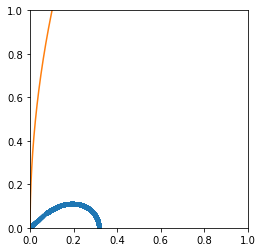

In [165]:
## Fake data for testing
R_act3=.1
wk_act3 = 10
R_act2=10
wk_act2 = .1
#noise= 0.01
wt = np.concatenate((np.linspace(.01,100,10000),np.linspace(101,1e4,1000)))
Zr3 = np.real(np.sqrt(R_act3/(1+(1j*wt/wk_act3))))
Zi3 = np.imag(np.sqrt(R_act3/(1+(1j*wt/wk_act3))))
Zr2 = np.real((0/3)+R_act2/(1+1j*wt/wk_act2))
Zi2 = np.imag((0/3)+R_act2/(1+1j*wt/wk_act2))
#Zr2 = np.sqrt(R_act/(1+(w/wk_act)**2))#+noise*np.random.random(w.size)
#Zi2 = -np.sqrt(R_act*w/(wk_act*(1+(w/wk_act)**2)))#+noise*np.random.random(w.size)
fig,ax= plt.subplots(1,1)
ax.plot(Zr3,-Zi3,'.',Zr2,-Zi2)
ax.set_aspect('equal')
ax.axis([0,1, 0,1])


In [12]:
fit.params['R'].value

2.5637139114344598